In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
results_df = pd.read_json('./results.json', orient='records')

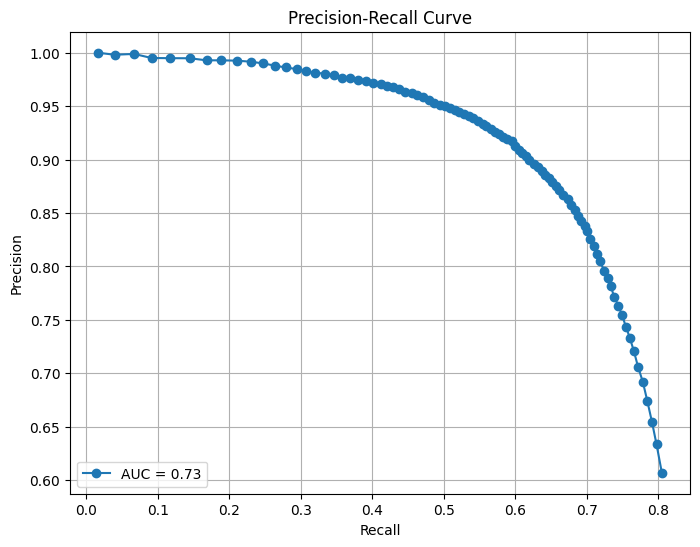

In [24]:
pr_curve_df = results_df[['conf_threshold', 'precision', 'recall']]
pr_curve_df = pr_curve_df[pr_curve_df['conf_threshold'] <= 0.95]
pr_curve_df = pr_curve_df.sort_values(by='recall', ascending=True)

# Compute AUC using numpy's trapezoidal rule
auc_pr = np.trapz(pr_curve_df['precision'], pr_curve_df['recall'])

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(pr_curve_df['recall'], pr_curve_df['precision'], marker='o', label=f'AUC = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.show()